In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ISLP import load_data

from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
auto = load_data('Auto')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
mpg_median = auto['mpg'].median()
mpg_median

22.75

In [11]:
mpg01 = np.where(auto['mpg'] > mpg_median, 1, 0)
auto['mpg01'] = mpg01

In [15]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [21]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.500000
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.500639
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.500000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,1.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000


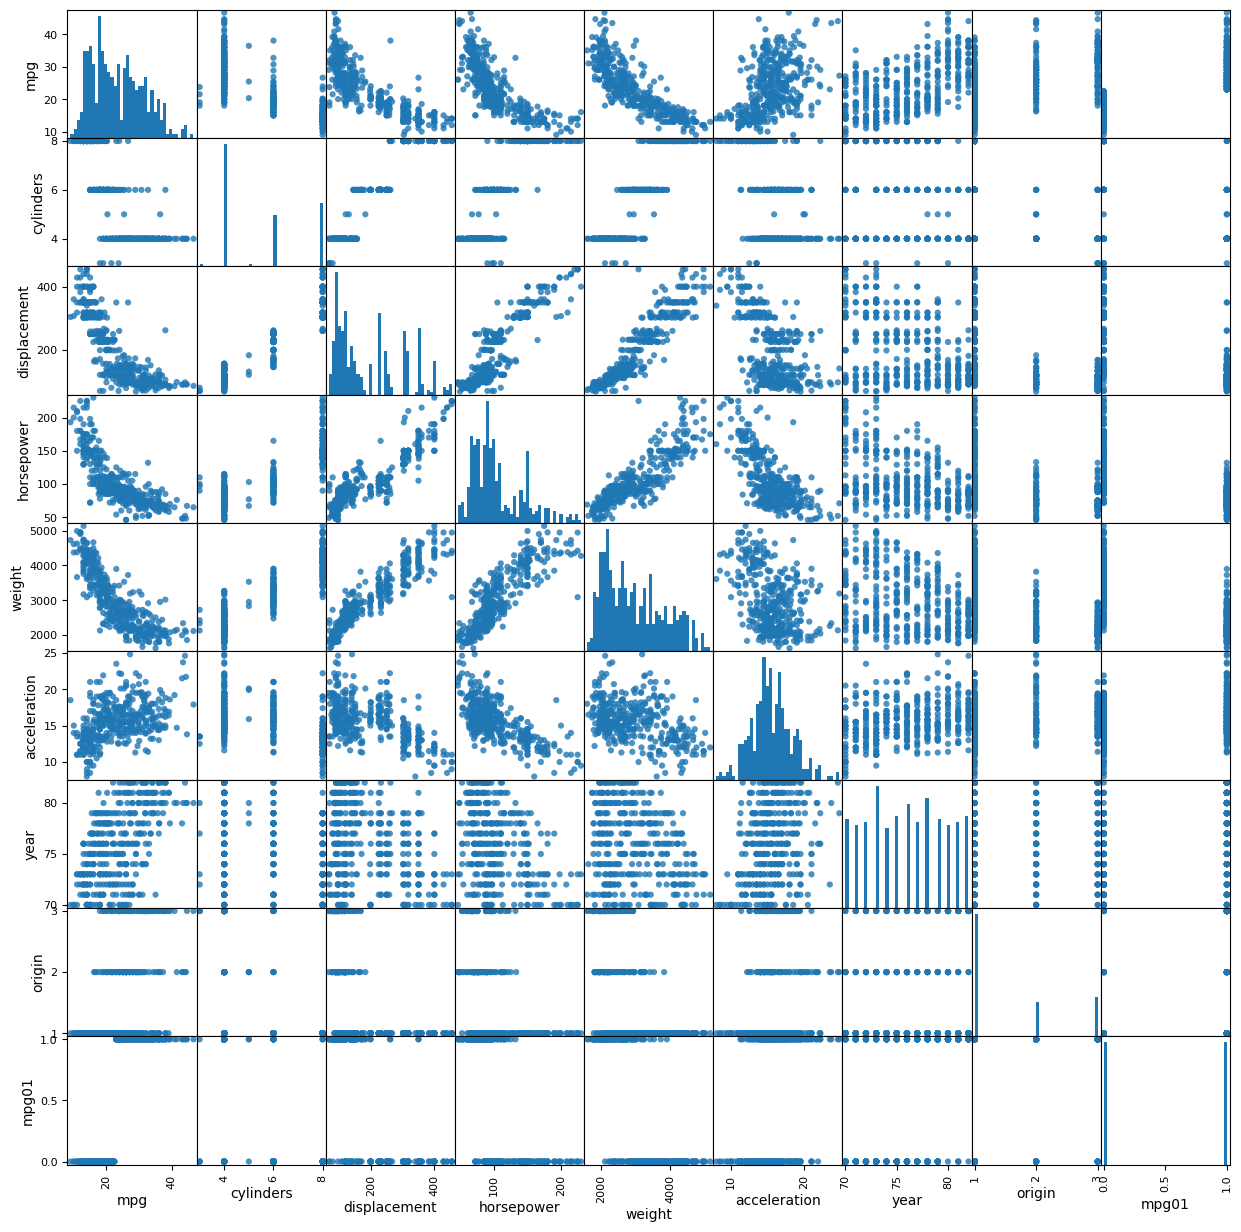

In [18]:
pd.plotting.scatter_matrix(
    auto,
    figsize=(15, 15), marker='o',
    hist_kwds={'bins': 40}, s=20, alpha=.8
);

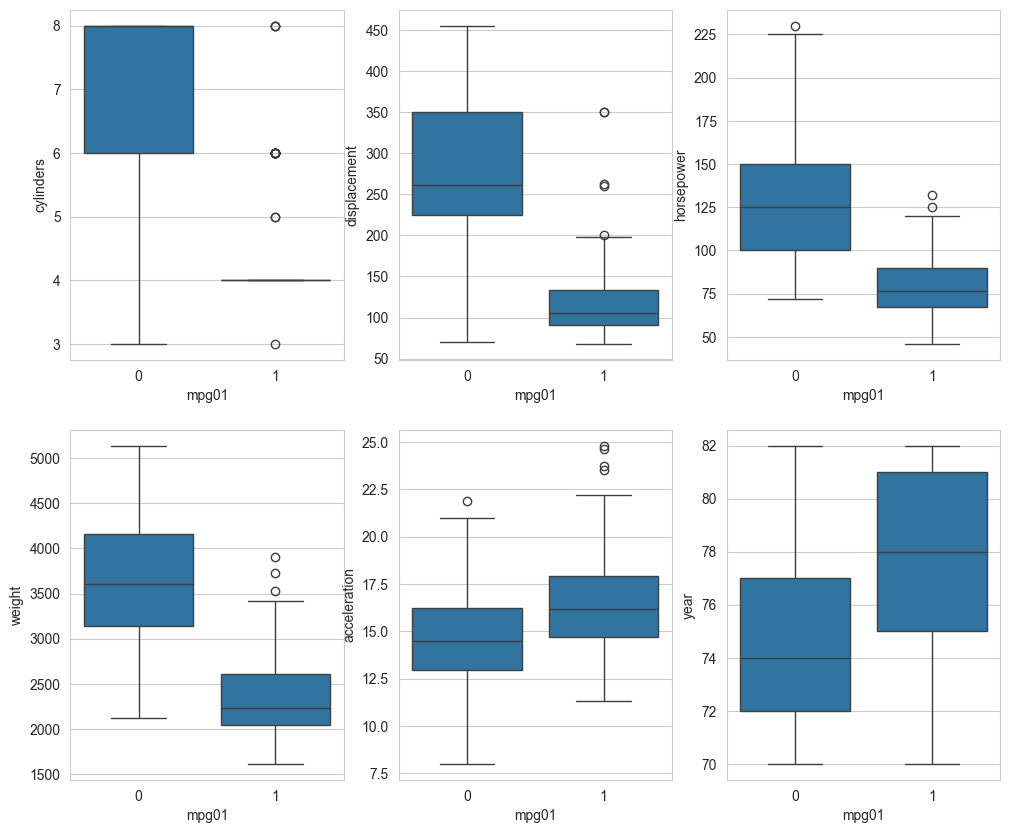

In [40]:
# Boxplots
columns = [['cylinders', 'displacement', 'horsepower'], ['weight', 'acceleration', 'year']]
fig, ax = plt.subplots(2, 3, figsize=(12, 10))
sns.set_style("whitegrid")
for row in range(len(columns)):
    for col, c in enumerate(columns[row]):
        sns.boxplot(x = 'mpg01', y = c, data = auto, ax=ax[row][col])

<Axes: xlabel='origin'>

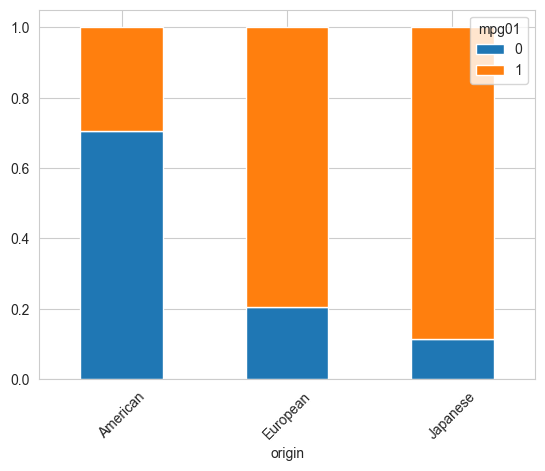

In [72]:
origin_by_mpg01 = pd.crosstab(index=auto['origin'],
                             columns=auto['mpg01'],
                             normalize="index")

# origin: Origin of car (1. American, 2. European, 3. Japanese)
origin_by_mpg01 = origin_by_mpg01.rename({1: 'American', 2: 'European', 3: 'Japanese'})
origin_by_mpg01.plot(kind='bar', stacked=True, rot=45)

By looking at the plots, the predictors that look more related to *mpg* are:
* cylinders
* displacement
* weight

In [104]:
# Split data into train and test sets
# Take, for example, 80% of the rows for train, and 20% for test
n_rows, _ = auto.shape
n_train = int(n_rows*0.5)
train, test = auto.iloc[:n_train], auto.iloc[n_train:]

In [105]:
auto.shape, train.shape, test.shape

((392, 10), (196, 10), (196, 10))

In [106]:
# Linear Discriminant Analysis

columns = ['cylinders', 'displacement', 'weight', 'horsepower']
X_train, y_train = train[columns], train['mpg01']
X_test, y_test = test[columns], test['mpg01']

lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [107]:
lda_predictions = lda.predict(X_test)
lda_predictions

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [108]:
test_score = lda.score(X_test, y_test)
train_score = lda.score(X_train, y_train)

print(f'Test score: {test_score}')
print(f'Test error: {1-test_score}')
print(f'\nTrain score: {train_score}')
print(f'Train error: {1-train_score}')

Test score: 0.9030612244897959
Test error: 0.09693877551020413

Train score: 0.8979591836734694
Train error: 0.10204081632653061


In [109]:
# QDA

qda = QDA()
qda.fit(X_train, y_train)

test_score = qda.score(X_test, y_test)
train_score = qda.score(X_train, y_train)

print(f'Test score: {test_score}')
print(f'Test error: {1-test_score}')
print(f'\nTrain score: {train_score}')
print(f'Train error: {1-train_score}')

Test score: 0.8724489795918368
Test error: 0.12755102040816324

Train score: 0.9081632653061225
Train error: 0.09183673469387754


In [110]:
# Logistic regression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)

test_score = lgr.score(X_test, y_test)
train_score = lgr.score(X_train, y_train)

print(f'Test score: {test_score}')
print(f'Test error: {1-test_score}')
print(f'\nTrain score: {train_score}')
print(f'Train error: {1-train_score}')

Test score: 0.8061224489795918
Test error: 0.19387755102040816

Train score: 0.9030612244897959
Train error: 0.09693877551020413


In [111]:
# Naive bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

test_score = nb.score(X_test, y_test)
train_score = nb.score(X_train, y_train)

print(f'Test score: {test_score}')
print(f'Test error: {1-test_score}')
print(f'\nTrain score: {train_score}')
print(f'Train error: {1-train_score}')

Test score: 0.8979591836734694
Test error: 0.10204081632653061

Train score: 0.9081632653061225
Train error: 0.09183673469387754


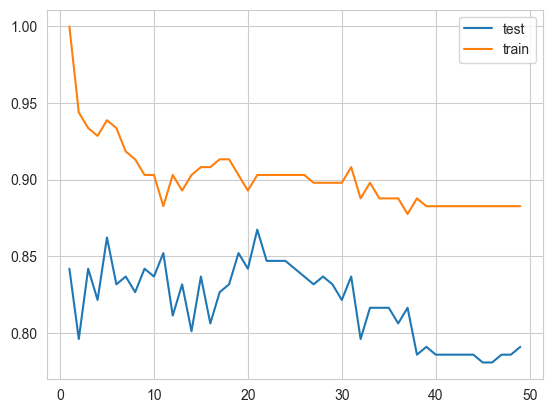

In [121]:
# KNN

test_scores = []
train_scores = []
k_values = list(range(1, 50))
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    test_scores.append(knn.score(X_test, y_test))
    train_scores.append(knn.score(X_train, y_train))

plt.plot(k_values, test_scores, label='test')
plt.plot(k_values, train_scores, label='train')
plt.legend()